# Q Predict Loan Eligibility for Dream Housing Finance company

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 
********

In [657]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score


# (A) TRAIN DATASET

In [658]:
# loading into python environment
train = pd.read_csv('C:/Users/Asus/NORKA/17th jan 2023/DATA/train_ctrUa4K.csv')

In [659]:
# display first 5 rows of the dataframe
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [660]:
# display information about the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [661]:
# distribution of different classes in  'Loan_Status' column
print(train.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


In [662]:
# percentage distribution of each classes in 'Loan_Status' column
train.groupby('Loan_Status').size()*100/len(train) 

Loan_Status
N    31.270358
Y    68.729642
dtype: float64

~ It is an imbalanced dataset

In [663]:
# unique values in 'Dependents' column
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [664]:
# display rows having '3+' in 'Dependents' column
train[train.loc[:, 'Dependents'] == '3+']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
78,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y


In [665]:
# filtering out numerical features and displaying it
train_numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
train_numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [666]:
# count of unique values
train['Loan_Amount_Term'].nunique()

10

In [667]:
# display unique values
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [668]:
# filtering out discrete numerical features and displaying it
train_numerical_discrete_features = [feature for feature in train_numerical_features if len(train[feature].unique()) < 12 and feature not in ['Loan_ID']]
train_numerical_discrete_features

['Loan_Amount_Term', 'Credit_History']

In [669]:
# filtering out continuous numerical features and displaying it
train_numerical_continuous_feature = [feature for feature in train_numerical_features if feature not in train_numerical_discrete_features+['Loan_ID']]
train_numerical_continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [670]:
# filtering out categorical features and displaying it
train_categorical_features = [feature for feature in train.columns if train[feature].dtypes == 'O' and feature not in ['Loan_ID']]
train_categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## MISSING VALUES

In [671]:
# number of null values in the dataframe 
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

~ Gender, Married, Dependents, Self_Employed are of object type columns having null values

~ LoanAmount, Loan_Amount_Term, Credit_History are of numerical type columns which are having null values

In [672]:
# percentage of missing values
train.isnull().sum()*100/len(train) 

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [673]:
# storing the categorical features with null values and displaying it
train_categorical_nan = [feature for feature in train.columns if train[feature].isnull().sum()> 0 and train[feature].dtypes=='O']
train_categorical_nan

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [674]:
# filling missing values with mode for categorical columns
for i in train_categorical_nan:
    train[i] = train[i].fillna(train[i].mode()[0])
    


In [675]:
# storing the numerical columns with null values and displaying it
train_numerical_nan = [feature for feature in train.columns if train[feature].isnull().sum()> 0 and train[feature].dtypes!='O']
train_numerical_nan

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

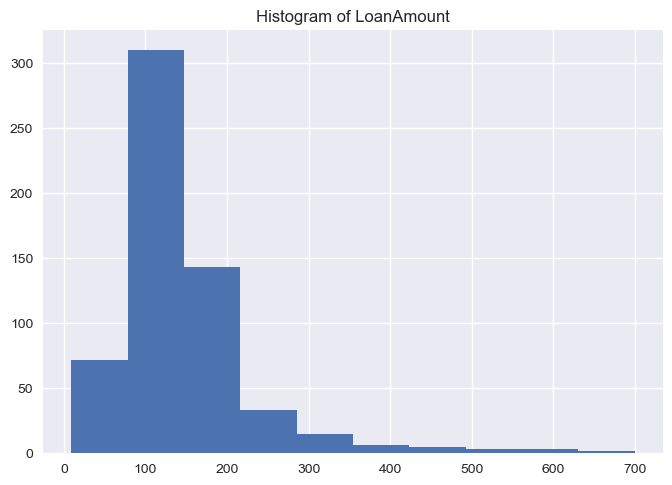

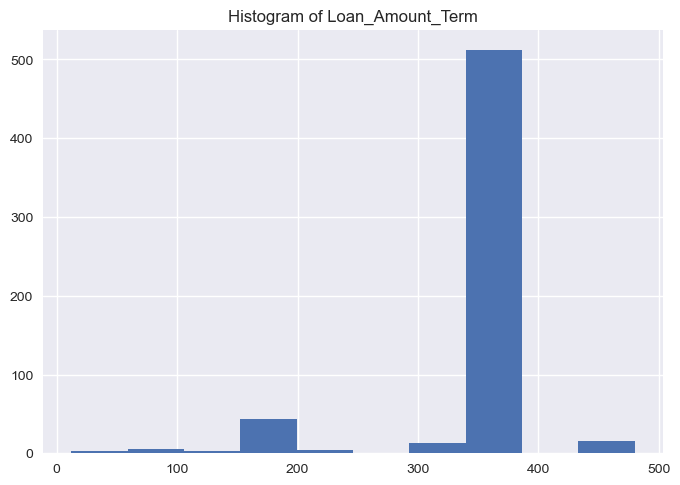

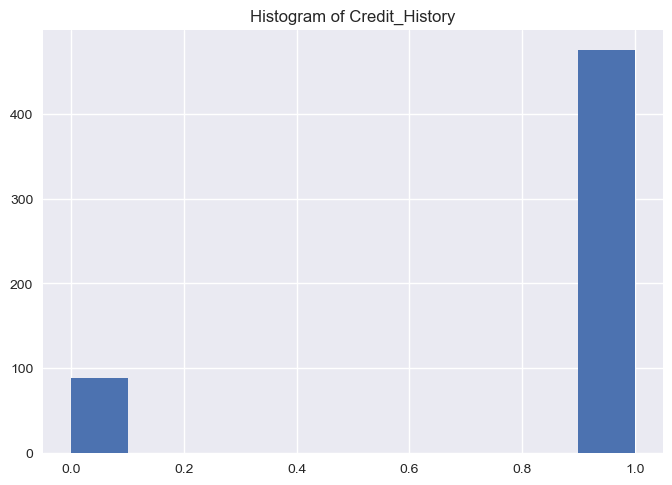

In [676]:
# plotting histogram of numerical columns with null values
for feature in train_numerical_nan:
    
    # histogram
    plt.hist(train[feature])
    text = "Histogram of"
    
    # display title
    plt.title(text+" "+feature)
    plt.show()

~ All the above histograms are skewed, hence using median to fill in the missing values

In [677]:
# displaying numerical columns with missing values
train_numerical_nan

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [678]:
# filling missing values in numerical columns with median 
for i in train_numerical_nan:
    train[i] = train[i].fillna(train[i].median())

In [679]:
# count of null values in the dataframe
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EDA

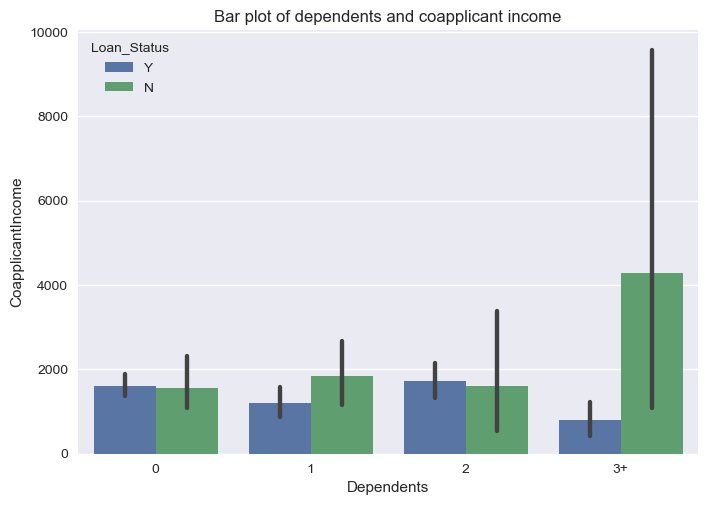

In [680]:
# style of seaborn
plt.style.use('seaborn')

# bar plot of Dependents and coapplicant income 
sns.barplot(x='Dependents', y='CoapplicantIncome', data=train, hue='Loan_Status')

# display title
plt.title('Bar plot of dependents and coapplicant income');

~ from the above plot, it is evident that eligibility for loan  does not depend on the number of dependents or the co-applicant income

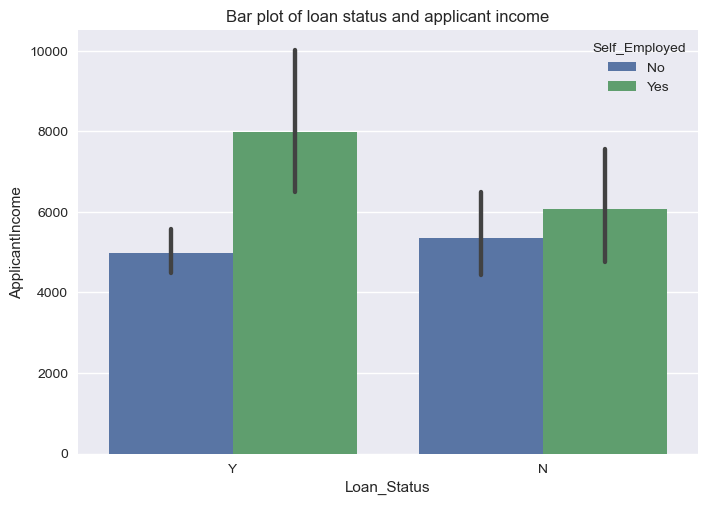

In [681]:
# bar plot of loan status and applicant income
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=train, hue='Self_Employed')

# display title
plt.title('Bar plot of loan status and applicant income');


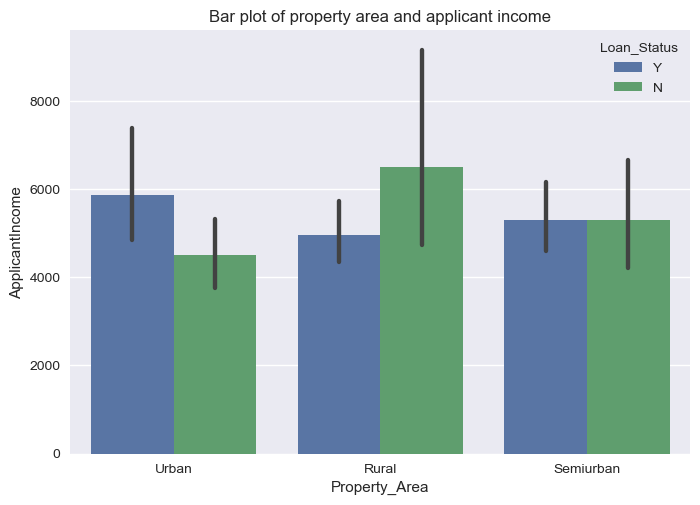

In [682]:
# bar plot of Property_Area and ApplicantIncome
sns.barplot(x='Property_Area', y='ApplicantIncome', data=train, hue='Loan_Status')

# display title
plt.title('Bar plot of property area and applicant income');



~ Eligibility of loan not only depends on applicant income but also on other factors like self employed, property area etc.

~ self employed people with higher income are having more chances for eligibility for loan.

~ If the property is in rural area, chances are more for disapproval of loan, since the cost of property in rural area is less.

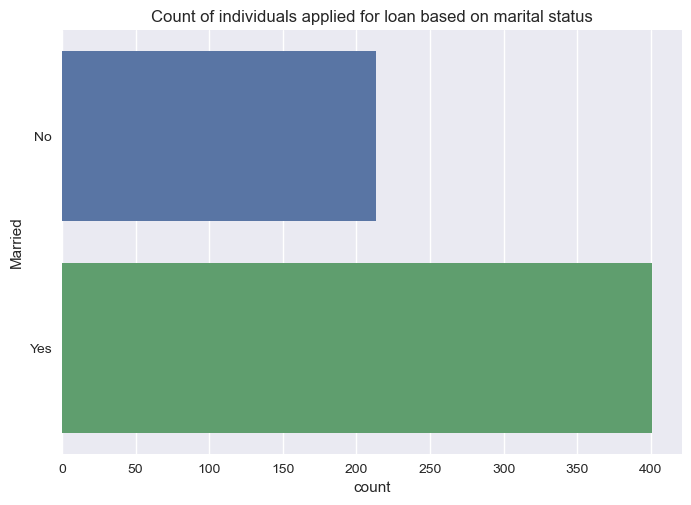

In [683]:
# count of marital status
sns.countplot(y='Married', data=train)

# display title
plt.title('Count of individuals applied for loan based on marital status');


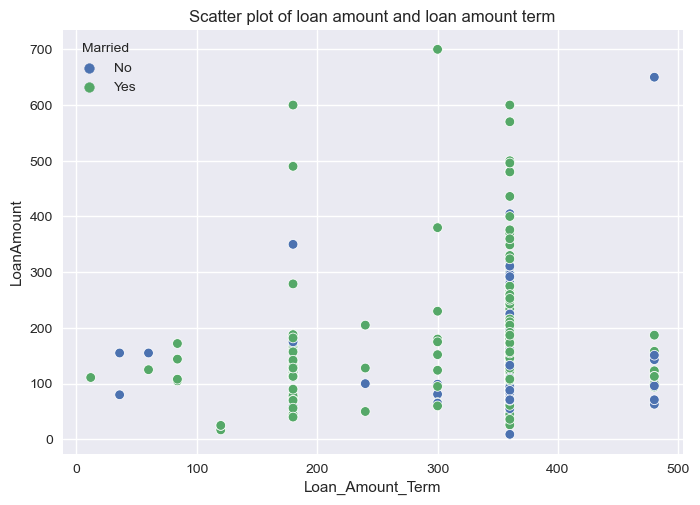

In [684]:
# scatter plot of loan amount and loan amount term 
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=train, hue='Married')

# display title
plt.title('Scatter plot of loan amount and loan amount term');

~ From the above plots, married people are applying more for loan when compared to unmarried people.

~ Loan amount and loan amount term are not directly proportional.

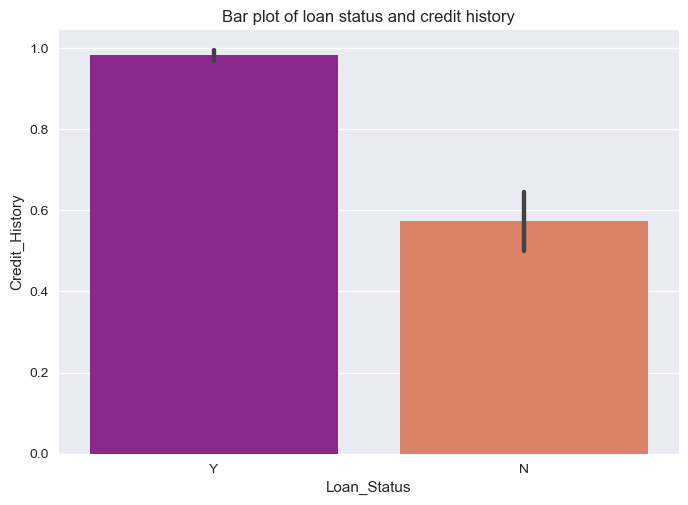

In [685]:
# bar plot of loan status and credit history
sns.barplot(x='Loan_Status', y = 'Credit_History', data=train, palette='plasma')

# display title
plt.title('Bar plot of loan status and credit history');

~ Higher the credit history for an individual, the person is eligible for loan.

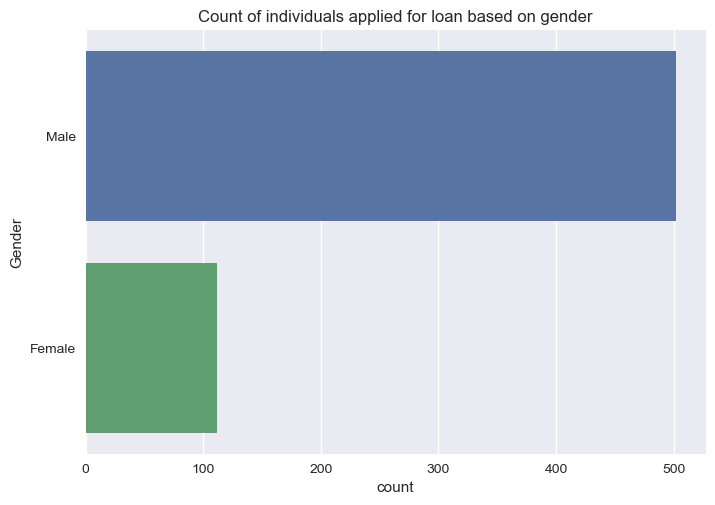

In [686]:
# countplot of gender applied for loan
sns.countplot(y='Gender', data = train)

# display title
plt.title('Count of individuals applied for loan based on gender');

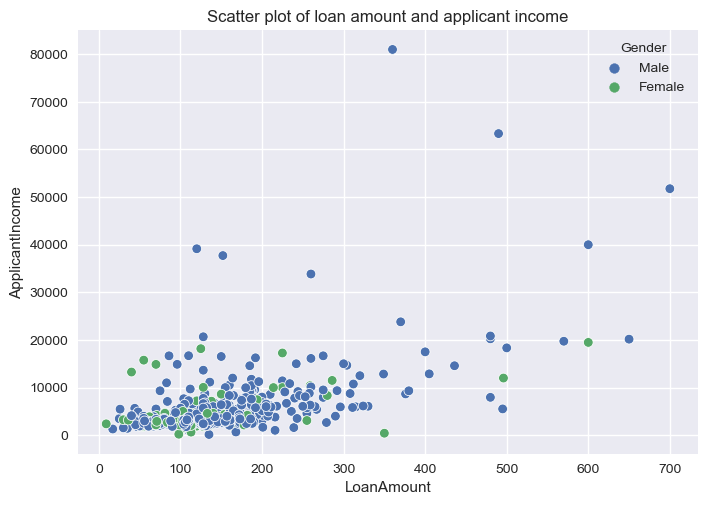

In [687]:
# scatter plot of loan amount and applicant income
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=train, hue='Gender')

# display title
plt.title('Scatter plot of loan amount and applicant income');

~ from the above plots, males apply more for loan when compared to females and the loan amount will be usually more for males when compared to females.

## OUTLIER
~ checking outliers for continuous numerical features-['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

##### Outliers in continuous numerical features

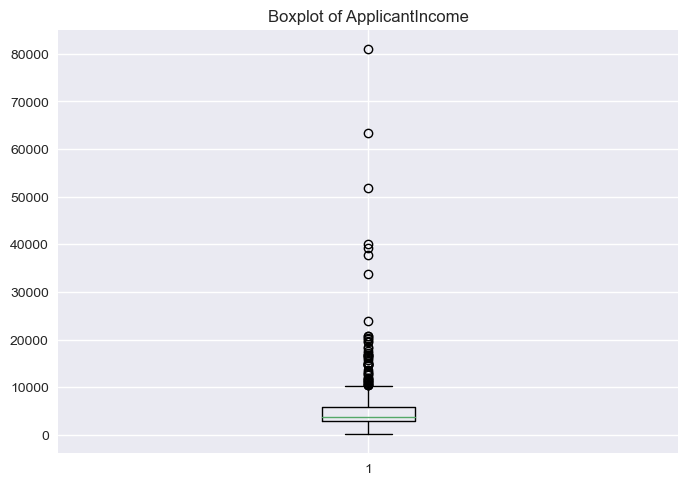

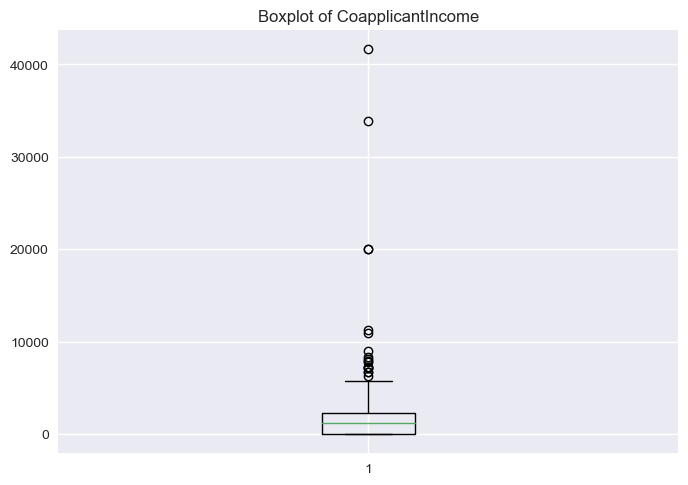

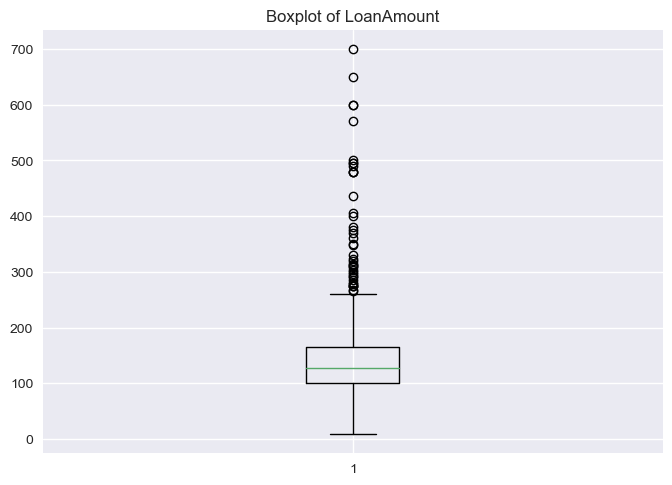

In [688]:
# boxplot of outliers in continuous numerical features
for i in train_numerical_continuous_feature:
    
    # boxplot
    plt.boxplot(train[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ Outliers are present in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' columns

In [689]:
# display outliers present in continuous numerical features
for i in train_numerical_continuous_feature:
    
    # display column name
    print(f"{i} column\n")
    
    # display first quartile
    train_Q1_i = np.percentile(train[i], 25, interpolation='midpoint')
    print(f"First Quartile = {train_Q1_i}")
    
    # display second quartile
    train_Q2_i = np.percentile(train[i], 50, interpolation='midpoint')
    print(f"Second Quartile = {train_Q2_i}")
    
    # display third quartile
    train_Q3_i = np.percentile(train[i], 75, interpolation='midpoint')
    print(f"Third Quartile = {train_Q3_i}")
    
    # display interquartile range
    train_IQR_i =  train_Q3_i-train_Q1_i
    print(f"IQR = {train_IQR_i}")
    
    # display lower whisker
    train_low_i = train_Q1_i-1.5*train_IQR_i
    print(f"lower whisker = {train_low_i}")
    
    # display upper whisker
    train_up_i = train_Q3_i+1.5*train_IQR_i
    print(f"upper whisker = {train_up_i}\n")
    
    # display outliers in columns
    train_outlier_i = [] 
    for train_x_i in train[i]:
        if((train_x_i > train_up_i) or (train_x_i < train_low_i)):
            train_outlier_i.append(train_x_i) 
    print(f"Outliers = {train_outlier_i}\n\n\n")
        
     

ApplicantIncome column

First Quartile = 2879.0
Second Quartile = 3812.5
Third Quartile = 5790.0
IQR = 2911.0
lower whisker = -1487.5
upper whisker = 10156.5

Outliers = [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]



CoapplicantIncome column

First Quartile = 0.0
Second Quartile = 1188.5
Third Quartile = 2292.5
IQR = 2292.5
lower whisker = -3438.75
upper whisker = 5731.25

Outliers = [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]



LoanAmount column

First Quartile = 100.5
Second Quartile = 128.0
Third Quartile = 164.5
IQR = 64.0
lower whisker = 4.5
upper whisker = 260.5

Outliers 

## CORRELATION

In [690]:
# Correlation performed on numerical features
train_P = train[train_numerical_features]

In [691]:
# creating an instance for correlation
train_corrmatrix = train_P.corr()

# displaying the values of 'corrmatrix'
train_corrmatrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


~Loan_Status - target variable

In [692]:
# display the summary statistics 
train[train_numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [693]:
# unique values in 'Credit_History' column
train['Credit_History'].unique()

array([1., 0.])

## SCALING
### MIN MAX SCALING
~ Performing min max scaling on numerical_features without 'Credit_History' column, since it is an encoded column.


In [694]:
# preparing the dataframe to do min max scaling and display it
train_A = train[train_numerical_features].drop(['Credit_History'], axis = 1)
train_A

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [695]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1))

In [696]:
# Fit MinMaxScaler and tranform the scaled values
train_scaled = minmax.fit_transform(train_A)

# display
train_scaled

array([[0.07048856, 0.        , 0.17221418, 0.74358974],
       [0.05482993, 0.03619171, 0.17221418, 0.74358974],
       [0.03525046, 0.        , 0.08248915, 0.74358974],
       ...,
       [0.09798392, 0.00575995, 0.35311143, 0.74358974],
       [0.09193568, 0.        , 0.25759768, 0.74358974],
       [0.05482993, 0.        , 0.17945007, 0.74358974]])

In [697]:
# converting back to a dataframe since it is array format
train_scaled = pd.DataFrame(train_scaled, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
train_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.070489,0.000000,0.172214,0.743590
1,0.054830,0.036192,0.172214,0.743590
2,0.035250,0.000000,0.082489,0.743590
3,0.030093,0.056592,0.160637,0.743590
4,0.072356,0.000000,0.191027,0.743590
...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590
610,0.048930,0.000000,0.044863,0.358974
611,0.097984,0.005760,0.353111,0.743590
612,0.091936,0.000000,0.257598,0.743590


In [698]:
# display the summary statistics after applying scaling
train_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


## ENCODING

In [699]:
# display categorical columns
train_categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [700]:
# displaying unique values in categorical columns
for i in train_categorical_features:
    train_uni = train[i].unique()
    print(f"Unique values of {i} column = {train_uni}\n")

Unique values of Gender column = ['Male' 'Female']

Unique values of Married column = ['No' 'Yes']

Unique values of Dependents column = ['0' '1' '2' '3+']

Unique values of Education column = ['Graduate' 'Not Graduate']

Unique values of Self_Employed column = ['No' 'Yes']

Unique values of Property_Area column = ['Urban' 'Rural' 'Semiurban']

Unique values of Loan_Status column = ['Y' 'N']



### LABEL ENCODING
~ performing label encoding for 'Gender', 'Married', 'Education', 'Self_Employed' columns

In [701]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [702]:
# applying label encoder to 'Gender' column and displaying it
train_label_encoded_gender = le.fit_transform(train['Gender'])
train_label_encoded_gender

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [703]:
# converting 'Gender' column back to a dataframe since it is array format
train_label_encoded_gender = pd.DataFrame(train_label_encoded_gender, columns=['Gender'])
train_label_encoded_gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [704]:
# applying label encoder to 'Married' column and displaying it
train_label_encoded_married = le.fit_transform(train['Married'])
train_label_encoded_married

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [705]:
# converting 'Married' column back to a dataframe since it is array format
train_label_encoded_married = pd.DataFrame(train_label_encoded_married, columns=['Married'])
train_label_encoded_married

,Married
0,0
1,1
2,1
3,1
4,0
...,...
609,0
610,1
611,1
612,1


In [706]:
# applying label encoder to 'Education' column and displaying it
train_label_encoded_education = le.fit_transform(train['Education'])
train_label_encoded_education

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [707]:
# converting 'Education' column back to a dataframe since it is array format
train_label_encoded_education = pd.DataFrame(train_label_encoded_education, columns=['Education'])
train_label_encoded_education

,Education
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [708]:
# applying label encoder to 'Self_Employed' column and displaying it
train_label_encoded_selfemployed = le.fit_transform(train['Self_Employed'])
train_label_encoded_selfemployed

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [709]:
# converting 'Self_Employed' column back to a dataframe since it is array format
train_label_encoded_selfemployed = pd.DataFrame(train_label_encoded_selfemployed, columns=['Self_Employed'])
train_label_encoded_selfemployed

,Self_Employed
0,0
1,0
2,1
3,0
4,0
...,...
609,0
610,0
611,0
612,0


~ target = 'Loan_Status' column

### ONE HOT  ENCODING
~ performing one hot encoding for 'Dependents', 'Property_Area' columns


In [710]:
# performing one hot encoding on the column 'Dependents' and displaying it
train_hot_encoded_dependents = pd.get_dummies(train['Dependents'])

train_hot_encoded_dependents

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
609,1,0,0,0
610,0,0,0,1
611,0,1,0,0
612,0,0,1,0


In [711]:
# performing one hot encoding on the column 'Property_Area'  and displaying it
train_hot_encoded_propertyarea = pd.get_dummies(train['Property_Area'])

train_hot_encoded_propertyarea

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [712]:
# count of unique values 
train['Loan_ID'].nunique()

614

~ The train dataset is having 614 rows and  'Loan_ID' column is having 614 unique values. Hence it does not contribute much to the machine learning model.

## SPLITTING THE DATASET INTO FEATURES & TARGET

~ Features = 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area' columns

~ Target = 'Loan_Status' column

In [713]:
# concatenating the encoded and the scaled columns which gives features
train_X = pd.concat([train_label_encoded_gender, train_label_encoded_married, train_hot_encoded_dependents, train_label_encoded_education, train_label_encoded_selfemployed, train_scaled, train['Credit_History'], train_hot_encoded_propertyarea], axis=1) 

# display  features
train_X

,Gender,Married,0,1,2,3+,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,0,1,0,0,0,0,0,0.070489,0.000000,0.172214,0.743590,1.0,0,0,1
1,1,1,0,1,0,0,0,0,0.054830,0.036192,0.172214,0.743590,1.0,1,0,0
2,1,1,1,0,0,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,0,0,1
3,1,1,1,0,0,0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,0,0,1
4,1,0,1,0,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,1,0,0
610,1,1,0,0,0,1,0,0,0.048930,0.000000,0.044863,0.358974,1.0,1,0,0
611,1,1,0,1,0,0,0,0,0.097984,0.005760,0.353111,0.743590,1.0,0,0,1
612,1,1,0,0,1,0,0,0,0.091936,0.000000,0.257598,0.743590,1.0,0,0,1


In [714]:
# displaying target
train_y = train['Loan_Status']
train_y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## SPLITTING THE DATASET INTO TESTING & TRAINING DATASET

In [715]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(train_X, train_y, test_size = 0.20, random_state=8)

## MODELS

### 1) LOGISTIC REGRESSION

In [716]:
# creating an instance
classifier = BalancedBaggingClassifier(estimator=LogisticRegression(), sampling_strategy='not majority', replacement=False, random_state=8)

In [717]:
# fit the training data and create model
log_model = classifier.fit(X_train1, y_train1)

In [718]:
# predict the target of the validation data using the features of validation data
train_log_ypred = log_model.predict(X_val1)

In [719]:
# display confusion matrix
print(confusion_matrix(y_val1, train_log_ypred))

[[19 14]
 [ 0 90]]


In [720]:
# display accuracy score
print(balanced_accuracy_score(y_val1, train_log_ypred))

0.7878787878787878


In [721]:
# display recall sensitivity
print(recall_score(y_val1, train_log_ypred, pos_label='N'))


0.5757575757575758


In [722]:
# display recall specificity
print(recall_score(y_val1, train_log_ypred, pos_label='Y'))

1.0


In [723]:
# display classification report
print("\n", classification_report(y_val1, train_log_ypred))


               precision    recall  f1-score   support

           N       1.00      0.58      0.73        33
           Y       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



TUNING

In [724]:
# tuning logistic regression model hyper parameters
algorithms = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    
    # creating an instance for LogisticRegression()
    log_reg = LogisticRegression(max_iter= 4000, solver= algo)
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=log_reg, sampling_strategy='not majority', replacement=False, random_state=8)
    
    # fit the training data to the instance of LogisticRegression() and create a model
    log_model = classifier.fit(X_train1, y_train1)
    
    # predict the target of the validation data using the features of validation data
    train_log_ypred = log_model.predict(X_val1)
    
    # accuracy score
    score = balanced_accuracy_score(y_val1, train_log_ypred)
    print(f"balanced_accuracy_score ({algo}): {score}")

balanced_accuracy_score (lbfgs): 0.7878787878787878
balanced_accuracy_score (newton-cg): 0.7878787878787878
balanced_accuracy_score (liblinear): 0.7878787878787878
balanced_accuracy_score (sag): 0.7878787878787878
balanced_accuracy_score (saga): 0.7878787878787878


~ all the solvers are having the same accuracy

~ taking default solver = 'lbfgs' since the average score is the same for different solvers

In [725]:
# tuned model
# creating an instance for LogisticRegression()
log_reg = LogisticRegression(max_iter= 4000, solver='lbfgs')

# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=log_reg, sampling_strategy='not majority', replacement=False, random_state=8)
    
# fit the training data to the instance of LogisticRegression() and create a model
log_model = classifier.fit(X_train1, y_train1)
    
# predict the target of the validation data using the features of validation data
train_log_ypred = log_model.predict(X_val1)

# accuracy score
balanced_accuracy_score(y_val1, train_log_ypred)

0.7878787878787878

In [726]:
# display confusion matrix
print(confusion_matrix(y_val1, train_log_ypred))

[[19 14]
 [ 0 90]]


In [727]:
# display recall sensitivity
print(recall_score(y_val1, train_log_ypred, pos_label='N'))


0.5757575757575758


In [728]:
# display recall specificity
print(recall_score(y_val1, train_log_ypred, pos_label='Y'))

1.0


In [729]:
# display classification report
print("\n", classification_report(y_val1, train_log_ypred))


               precision    recall  f1-score   support

           N       1.00      0.58      0.73        33
           Y       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



### 2) kNN

In [730]:
# empty list
metric_k = [] 

# defining k
neighbors = np.arange(3,26) 

# finding accuracy for different k values
for k in neighbors:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=k), sampling_strategy='not majority', replacement=False, random_state=8)
    
    # fitting the train data and creating model
    knn_model = classifier.fit(X_train1, y_train1) 
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_knn = knn_model.predict(X_val1) 
    
    # storing accuracy
    knn_acc = balanced_accuracy_score(y_val1, train_y_pred_knn) 
    metric_k.append(knn_acc)

In [731]:
# displaying accuracy values for k = 3 to 25
metric_k

[0.6994949494949495,
 0.693939393939394,
 0.6898989898989899,
 0.6954545454545454,
 0.6595959595959596,
 0.6404040404040404,
 0.6252525252525252,
 0.6308080808080808,
 0.645959595959596,
 0.645959595959596,
 0.645959595959596,
 0.645959595959596,
 0.645959595959596,
 0.6363636363636364,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364]

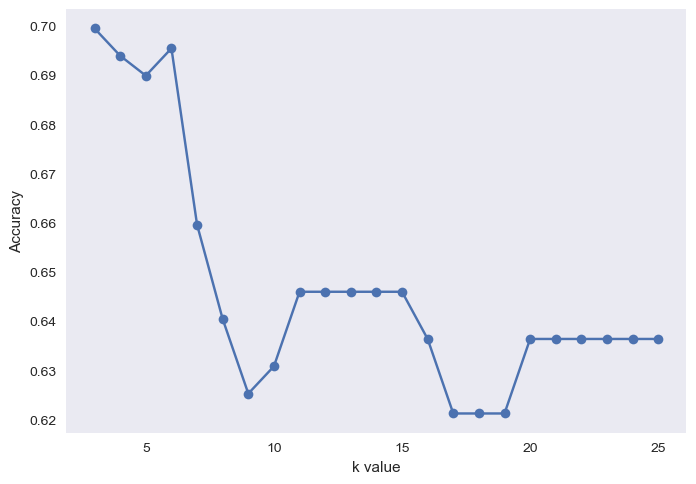

In [732]:
# plot k values versus accuracy
plt.plot(neighbors, metric_k, 'o-') 

# label on x axis
plt.xlabel('k value')

# label on y axis
plt.ylabel('Accuracy')

# display grid
plt.grid()

~ from the above display, k value = 3 having highest accuracy (0.6994949494949495)

In [733]:
# creating an instance for classifier with k = 3
classifier = BalancedBaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), sampling_strategy='not majority', replacement=False, random_state=8)
    

# fitting the train data and creating the model using k = 3
knn_model = classifier.fit(X_train1, y_train1) 

# predict the target of the validation data using the features of validation data with k = 3 
train_y_pred_knn = knn_model.predict(X_val1)

In [734]:
# display confusion matrix
print(confusion_matrix(y_val1, train_y_pred_knn))

# display balanced accuracy score
print(balanced_accuracy_score(y_val1, train_y_pred_knn))

# display recall sensitivity
print(recall_score(y_val1, train_y_pred_knn, pos_label='N'))

# display recall specificity
print(recall_score(y_val1, train_y_pred_knn, pos_label='Y'))


[[15 18]
 [ 5 85]]
0.6994949494949495
0.45454545454545453
0.9444444444444444


In [735]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_knn))


               precision    recall  f1-score   support

           N       0.75      0.45      0.57        33
           Y       0.83      0.94      0.88        90

    accuracy                           0.81       123
   macro avg       0.79      0.70      0.72       123
weighted avg       0.81      0.81      0.80       123



### 3)  SVM MODEL

In [736]:
# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=SVC(tol=1e-4, verbose=1, max_iter=2500) , sampling_strategy='not majority', replacement=False, random_state=8)
    

In [737]:
# creating model using training data
svm_mod = classifier.fit(X_train1, y_train1) 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [738]:
# predict the target of the validation data using the features of validation data
train_y_pred_svm = svm_mod.predict(X_val1) 

In [739]:
# display accuracy score
print(balanced_accuracy_score(y_val1, train_y_pred_svm))

0.7878787878787878


In [740]:
# display confusion matrix
print(confusion_matrix(y_val1, train_y_pred_svm))

# display recall sensitivity
print(recall_score(y_val1, train_y_pred_svm, pos_label='N'))

# display recall specificity
print(recall_score(y_val1, train_y_pred_svm, pos_label='Y'))


[[19 14]
 [ 0 90]]
0.5757575757575758
1.0


In [741]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_svm))


               precision    recall  f1-score   support

           N       1.00      0.58      0.73        33
           Y       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



TUNING

~Tuning the SVM model using hyper parameters
#### A) Tuning SVM Model using kernel

In [742]:
# tuning SVM model using 'kernel'
kern = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kern:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=SVC(tol=1e-4, verbose=1, max_iter=2500) , sampling_strategy='not majority', replacement=False, random_state=8)
    
    # creating model using training data
    svm_mod = classifier.fit(X_train1, y_train1) 
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_svm = svm_mod.predict(X_val1)
    
    # display accuracy score 
    score = balanced_accuracy_score(y_val1, train_y_pred_svm)
    print(f"\n accuracy_score ({i}): {score}\n")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (linear): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (rbf): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (poly): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (sigmoid): 0.7878787878787878



~ All the 4 kernels are having the same accuracy

#### B) Tuning SVM Model using 'C'

In [743]:
# tuning SVM model using 'C'
c = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4,1e5]
for i in c:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=SVC(tol=1e-4, verbose=1, max_iter=2500, kernel = 'linear') , sampling_strategy='not majority', replacement=False, random_state=8)
    
    # creating model using training data
    svm_mod = classifier.fit(X_train1, y_train1) 
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_svm = svm_mod.predict(X_val1)
    
    # display accuracy score 
    score = balanced_accuracy_score(y_val1, train_y_pred_svm)
    print(f"\n accuracy_score ({i}): {score}\n")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (1e-05): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



 accuracy_score (0.0001): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (0.001): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][LibSVM]
 accuracy_score (0.01): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (0.1): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (1): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (10): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



 accuracy_score (100.0): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (1000.0): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][LibSVM]
 accuracy_score (10000.0): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (100000.0): 0.7878787878787878



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


~ All the values of C are having the same accuracy

#### C) Tuning SVM Model using 'gamma'

In [744]:
# tuning SVM model using 'gamma'
gamm = [0.1, 1, 10, 100]
for i in gamm:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=SVC(tol=1e-4, verbose=1, max_iter=2500, kernel = 'linear', C = 1, gamma = i) , sampling_strategy='not majority', replacement=False, random_state=8)
    
    # creating model using training data
    svm_mod = classifier.fit(X_train1, y_train1) 
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_svm = svm_mod.predict(X_val1)
    
    # display accuracy score 
    score = balanced_accuracy_score(y_val1, train_y_pred_svm)
    print(f"\n accuracy_score ({i}): {score}\n")

[LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (0.1): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



 accuracy_score (1): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (10): 0.7878787878787878

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score (100): 0.7878787878787878



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


~ Models with different values of gamma are having the same accuracy

In [745]:
# Tuned model

# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=SVC(tol=1e-4, verbose=1, max_iter=2500, kernel = 'linear', C = 0.1, gamma = 1) , sampling_strategy='not majority', replacement=False, random_state=8)

# creating model using training data
svm_mod = classifier.fit(X_train1, y_train1) 
    
# predict the target of the validation data using the features of validation data
train_y_pred_svm = svm_mod.predict(X_val1)

# display balanced accuracy score 
score = balanced_accuracy_score(y_val1, train_y_pred_svm)
print(f"\n accuracy_score: {score}\n")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
 accuracy_score: 0.7878787878787878



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [746]:
# display confusion matrix
print(confusion_matrix(y_val1, train_y_pred_svm))

# display recall sensitivity
print(recall_score(y_val1, train_y_pred_svm, pos_label='N'))

# display recall specificity
print(recall_score(y_val1, train_y_pred_svm, pos_label='Y'))



[[19 14]
 [ 0 90]]
0.5757575757575758
1.0


In [747]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_svm))


               precision    recall  f1-score   support

           N       1.00      0.58      0.73        33
           Y       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



### 4) DECISION TREE

In [748]:
# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),sampling_strategy='not majority', replacement=False, random_state=8)

In [749]:
# creating model using training data 
dectree_mod = classifier.fit(X_train1, y_train1)

In [750]:
# predict the target of the validation data using the features of validation data
train_y_pred_dectree = dectree_mod.predict(X_val1)

In [751]:
# display confusion matrix
confusion_matrix(y_val1, train_y_pred_dectree)

array([[23, 10],
       [13, 77]], dtype=int64)

In [752]:
# display accuracy score
balanced_accuracy_score(y_val1, train_y_pred_dectree)

0.7762626262626262

In [753]:
# display recall sensitivity
print(recall_score(y_val1, train_y_pred_dectree, pos_label='N'))

0.696969696969697


In [754]:
# display recall specificity
print(recall_score(y_val1, train_y_pred_dectree, pos_label='Y'))

0.8555555555555555


In [755]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_dectree))


               precision    recall  f1-score   support

           N       0.64      0.70      0.67        33
           Y       0.89      0.86      0.87        90

    accuracy                           0.81       123
   macro avg       0.76      0.78      0.77       123
weighted avg       0.82      0.81      0.82       123



TUNING

In [756]:
# Decision Tree Classifier tuning using max_depth
max_depth = [1,2,3,4,5,6,7,8,9,10]

for i in max_depth:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth= i),sampling_strategy='not majority', replacement=False, random_state=8)
    
    
    # creating model using training data 
    dectree_model = classifier.fit(X_train1, y_train1)
    
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_dectree = dectree_model.predict(X_val1)
    
    # display accuracy score
    score = balanced_accuracy_score(y_val1, train_y_pred_dectree)
    print(f"\naccuracy_score ({i}): {score}\n")


accuracy_score (1): 0.7878787878787878


accuracy_score (2): 0.7878787878787878


accuracy_score (3): 0.7878787878787878


accuracy_score (4): 0.7878787878787878


accuracy_score (5): 0.7823232323232323


accuracy_score (6): 0.7767676767676768


accuracy_score (7): 0.7863636363636364


accuracy_score (8): 0.7752525252525253


accuracy_score (9): 0.7904040404040404


accuracy_score (10): 0.8055555555555556



~  max_depth = 10 having the highest accuracy

In [757]:
# Tuned model

# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth= 10),sampling_strategy='not majority', replacement=False, random_state=8)

# creating model using training data 
dectree_model = classifier.fit(X_train1, y_train1)
       
# predict the target of the validation data using the features of validation data
train_y_pred_dectree = dectree_model.predict(X_val1)

# display accuracy score
score = balanced_accuracy_score(y_val1, train_y_pred_dectree)
print(f"\naccuracy_score: {score}\n")


accuracy_score: 0.8055555555555556



In [758]:
# display confusion matrix
confusion_matrix(y_val1, train_y_pred_dectree)

array([[22, 11],
       [ 5, 85]], dtype=int64)

In [759]:
# display recall sensitivity
print(recall_score(y_val1, train_y_pred_dectree, pos_label='N'))

0.6666666666666666


In [760]:
# display recall specificity
print(recall_score(y_val1, train_y_pred_dectree, pos_label='Y'))

0.9444444444444444


In [761]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_dectree))


               precision    recall  f1-score   support

           N       0.81      0.67      0.73        33
           Y       0.89      0.94      0.91        90

    accuracy                           0.87       123
   macro avg       0.85      0.81      0.82       123
weighted avg       0.87      0.87      0.87       123



### 5) RANDOM FOREST

In [762]:
# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=RandomForestClassifier(), sampling_strategy='not majority',replacement=False, random_state=8)

In [763]:
# creating model using training data 
ranfor_model =classifier.fit(X_train1, y_train1)

In [764]:
# predict the target of the validation data using the features of validation data
train_y_pred_ranfor = ranfor_model.predict(X_val1)

In [765]:
# display confusion matrix
confusion_matrix(y_val1, train_y_pred_ranfor)

array([[20, 13],
       [ 3, 87]], dtype=int64)

In [766]:
# display accuracy score
balanced_accuracy_score(y_val1, train_y_pred_ranfor)

0.7863636363636364

In [767]:
# display recall sensitivity
print(recall_score(y_val1, train_y_pred_ranfor, pos_label='N'))

0.6060606060606061


In [768]:
# display recall specificity
print(recall_score(y_val1, train_y_pred_ranfor, pos_label='Y'))

0.9666666666666667


In [769]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_ranfor))


               precision    recall  f1-score   support

           N       0.87      0.61      0.71        33
           Y       0.87      0.97      0.92        90

    accuracy                           0.87       123
   macro avg       0.87      0.79      0.82       123
weighted avg       0.87      0.87      0.86       123



TUNING

In [770]:
# Random Forest Classifier tuning using max_depth
max_depth = [1,2,3,4,5,6,7,8,9,10]

for i in max_depth:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=RandomForestClassifier(max_depth=i), sampling_strategy='not majority',replacement=False, random_state=8)
    
    # creating model using training data 
    ranfor_model = classifier.fit(X_train1, y_train1)
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_ranfor = ranfor_model.predict(X_val1)
    
    # display accuracy score
    score = balanced_accuracy_score(y_val1, train_y_pred_ranfor)
    print(f"\n accuracy_score ({i}): {score}\n")


 accuracy_score (1): 0.5


 accuracy_score (2): 0.7878787878787878


 accuracy_score (3): 0.7878787878787878


 accuracy_score (4): 0.7878787878787878


 accuracy_score (5): 0.7878787878787878


 accuracy_score (6): 0.7878787878787878


 accuracy_score (7): 0.7878787878787878


 accuracy_score (8): 0.7823232323232323


 accuracy_score (9): 0.7974747474747474


 accuracy_score (10): 0.7974747474747474



~  max_depth = 9, 10 having the highest accuracy

In [771]:
# Random Forest Classifier Tuning based on 'n_estimators'
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for i in n_estimators:
    
    # creating an instance for classifier
    classifier = BalancedBaggingClassifier(estimator=RandomForestClassifier(n_estimators=i, max_depth = 9), sampling_strategy='not majority',replacement=False, random_state=8)
    
    # creating model using training data 
    ranfor_model = classifier.fit(X_train1, y_train1)
    
    # predict the target of the validation data using the features of validation data
    train_y_pred_ranfor = ranfor_model.predict(X_val1)
    
    # display balanced accuracy score
    score = balanced_accuracy_score(y_val1, train_y_pred_ranfor)
    print(f"\n accuracy_score ({i}): {score}\n")


 accuracy_score (50): 0.7823232323232323


 accuracy_score (100): 0.7974747474747474


 accuracy_score (150): 0.7974747474747474


 accuracy_score (200): 0.7974747474747474


 accuracy_score (250): 0.7974747474747474


 accuracy_score (300): 0.7974747474747474


 accuracy_score (350): 0.7974747474747474



~ n_estimators = 100, 150, 200, 250, 300, 350 having the highest accuracy

In [772]:
# tuned model
# creating an instance for classifier
classifier = BalancedBaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, max_depth = 9), sampling_strategy='not majority',replacement=False, random_state=8)
    
# creating model using training data 
ranfor_model = classifier.fit(X_train1, y_train1)
    
# predict the target of the validation data using the features of validation data
train_y_pred_ranfor = ranfor_model.predict(X_val1)

# display accuracy score
balanced_accuracy_score(y_val1, train_y_pred_ranfor)

0.7974747474747474

In [773]:
# display confusion matrix
confusion_matrix(y_val1, train_y_pred_ranfor)

array([[20, 13],
       [ 1, 89]], dtype=int64)

In [774]:
# display recall sensitivity
print(recall_score(y_val1, train_y_pred_ranfor, pos_label='N'))

0.6060606060606061


In [775]:
# display recall specificity
print(recall_score(y_val1, train_y_pred_ranfor, pos_label='Y'))

0.9888888888888889


In [776]:
# display classification report
print("\n", classification_report(y_val1, train_y_pred_ranfor))


               precision    recall  f1-score   support

           N       0.95      0.61      0.74        33
           Y       0.87      0.99      0.93        90

    accuracy                           0.89       123
   macro avg       0.91      0.80      0.83       123
weighted avg       0.89      0.89      0.88       123



# (B) TEST DATASET

In [777]:
# loading into python environment
test = pd.read_csv('C:/Users/Asus/NORKA/17th jan 2023/DATA/test_lAUu6dG.csv')

In [778]:
# display first 5 rows of the dataframe
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [779]:
# display information about the dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [780]:
# display unique values
test['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [781]:
# display rows having '3+' in 'Dependents' column
test[test.loc[:, 'Dependents'] == '3+']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
17,LP001107,Male,Yes,3+,Graduate,No,3786,333,126.0,360.0,1.0,Semiurban
21,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban
49,LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250,187.0,360.0,1.0,Semiurban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
59,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban
64,LP001348,Male,Yes,3+,Not Graduate,No,4490,0,125.0,360.0,1.0,Urban
80,LP001420,Male,Yes,3+,Graduate,No,3829,1103,163.0,360.0,0.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban
91,LP001483,Male,Yes,3+,Graduate,No,13518,0,390.0,360.0,1.0,Rural


In [782]:
# filtering out numerical features and displaying it
test_numerical_features = [feature for feature in test.columns if test[feature].dtypes != 'O']
test_numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [783]:
# count of unique values
test['Loan_Amount_Term'].nunique()

12

In [784]:
# filtering out discrete numerical features and displaying it
test_numerical_discrete_features = [feature for feature in test_numerical_features if len(test[feature].unique()) < 14 and feature not in ['Loan_ID']]
test_numerical_discrete_features

['Loan_Amount_Term', 'Credit_History']

In [785]:
# filtering out continuous numerical features and displaying it
test_numerical_continuous_feature = [feature for feature in test_numerical_features if feature not in test_numerical_discrete_features+['Loan_ID']]
test_numerical_continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [786]:
# filtering out categorical features and displaying it
test_categorical_features = [feature for feature in test.columns if test[feature].dtypes == 'O' and feature not in ['Loan_ID']]
test_categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

## MISSING VALUES

In [787]:
# number of null values in the dataframe 
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

~ Gender,  Dependents, Self_Employed are of object type columns having null values

~ LoanAmount, Loan_Amount_Term, Credit_History are of numerical type columns which are having null values

In [788]:
# percentage of missing values
test.isnull().sum()*100/len(test) 

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [789]:
# storing the categorical features with null values and displaying it
test_categorical_nan = [feature for feature in test.columns if test[feature].isnull().sum()> 0 and test[feature].dtypes=='O']
test_categorical_nan

['Gender', 'Dependents', 'Self_Employed']

In [790]:
# filling missing values with mode for categorical columns
for i in test_categorical_nan:
    test[i] = test[i].fillna(test[i].mode()[0])
    

In [791]:
# storing the numerical columns with null values and displaying it
test_numerical_nan = [feature for feature in test.columns if test[feature].isnull().sum()> 0 and test[feature].dtypes!='O']
test_numerical_nan

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

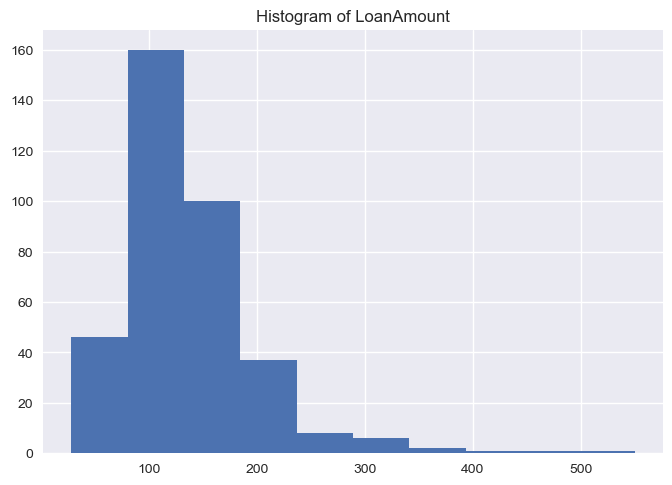

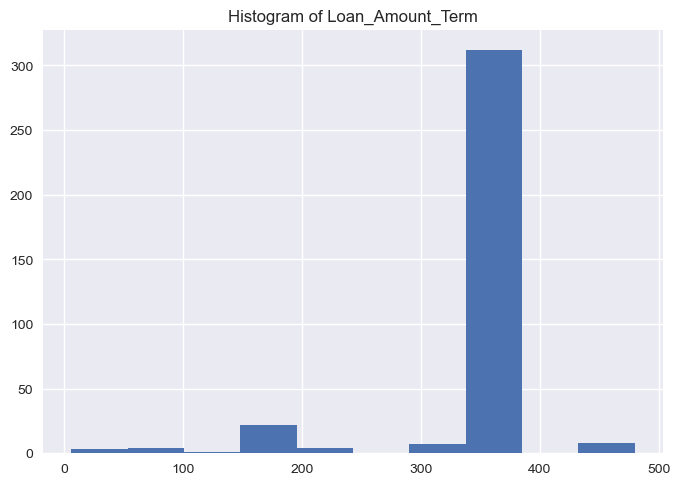

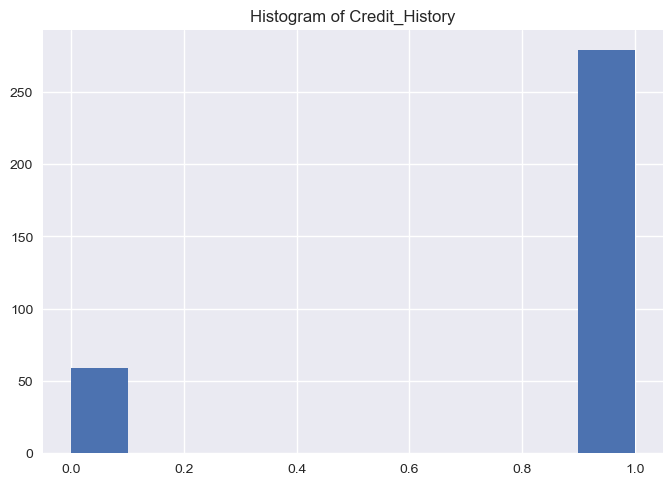

In [792]:
# plotting histogram of numerical columns with null values
for feature in test_numerical_nan:
    
    # histogram
    plt.hist(test[feature])
    text = "Histogram of"
    
    # display title
    plt.title(text+" "+feature)
    plt.show()

~ All the above histograms are skewed, hence using median to fill in the missing values

In [793]:
# displaying numerical columns with missing values
test_numerical_nan

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [794]:
# filling missing values in numerical columns with median 
for i in test_numerical_nan:
    test[i] = test[i].fillna(test[i].median())

In [795]:
# count of null values in the dataframe
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## EDA

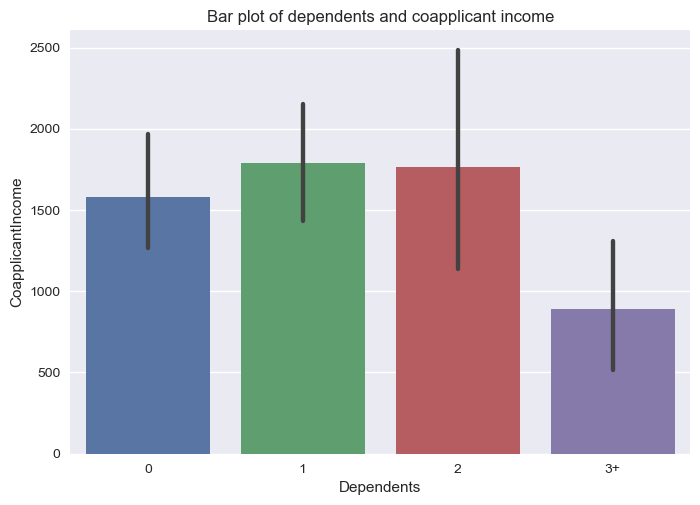

In [796]:
# style of seaborn
plt.style.use('seaborn')

# bar plot of Dependents and coapplicant income 
sns.barplot(x='Dependents', y='CoapplicantIncome', data=test)

# display title
plt.title('Bar plot of dependents and coapplicant income');

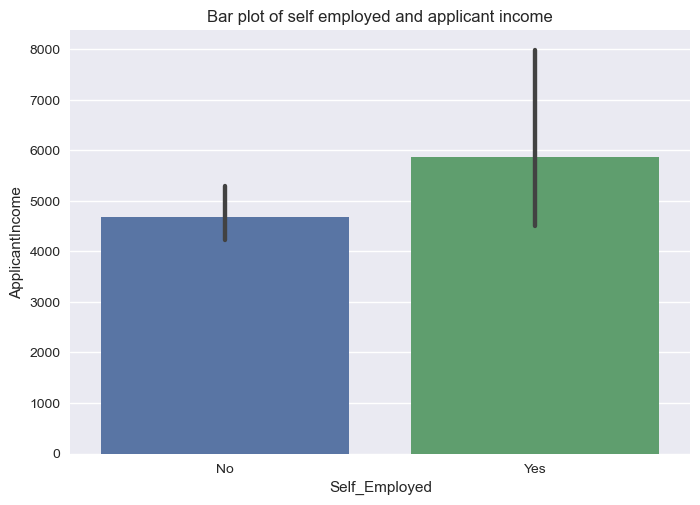

In [797]:
# bar plot of self employed and applicant income
sns.barplot(x='Self_Employed', y='ApplicantIncome', data=test)

# display title
plt.title('Bar plot of self employed and applicant income');


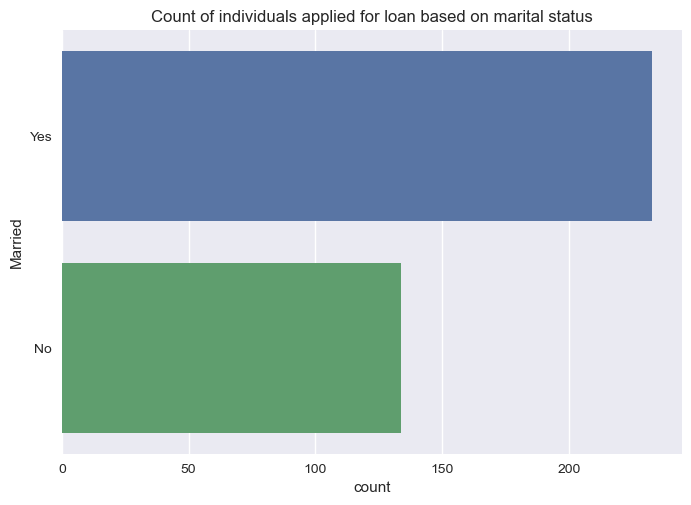

In [798]:
# count of marital status
sns.countplot(y='Married', data=test)

# display title
plt.title('Count of individuals applied for loan based on marital status');


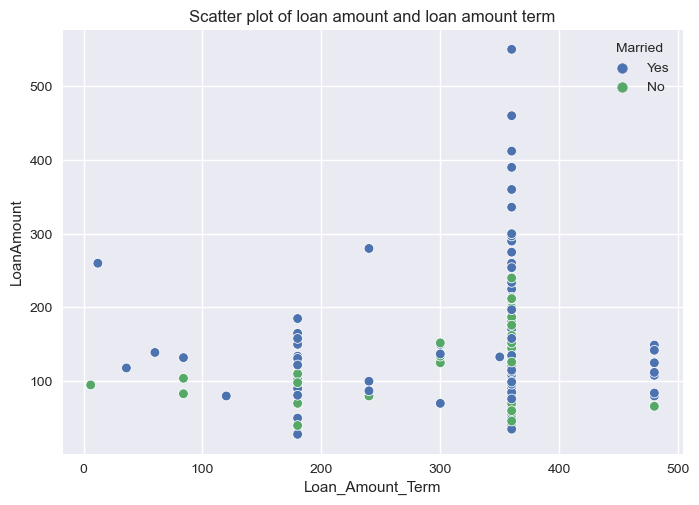

In [799]:
# scatter plot of loan amount and loan amount term 
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=test, hue='Married')

# display title
plt.title('Scatter plot of loan amount and loan amount term');

~ from the above plots, married people are applying more for loan when compared to unmarried people.

~ Loan amount and loan amount term are not directly proportional.

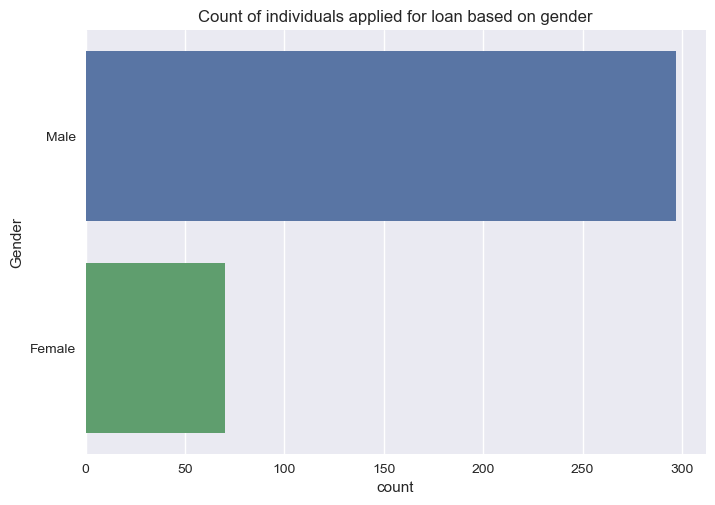

In [800]:
# countplot of gender applied for loan
sns.countplot(y='Gender', data = test)

# display title
plt.title('Count of individuals applied for loan based on gender');

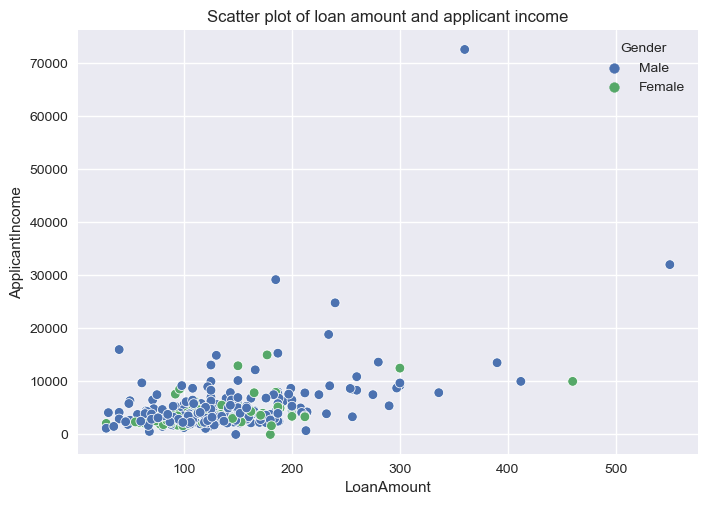

In [801]:
# scatter plot of loan amount and applicant income
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=test, hue='Gender')

# display title
plt.title('Scatter plot of loan amount and applicant income');

~ from the above plots, males apply more for loan when compared to females and the loan amount will be usually more for males when compared to females.

## OUTLIER
~ checking outliers for continuous numerical features-['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

##### Outliers in continuous numerical features

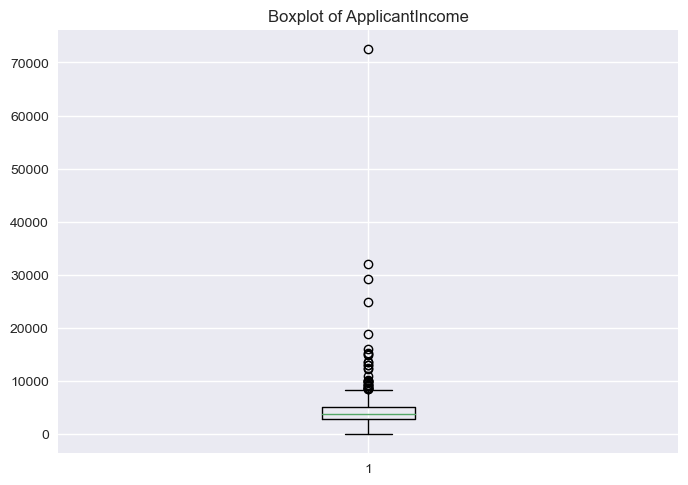

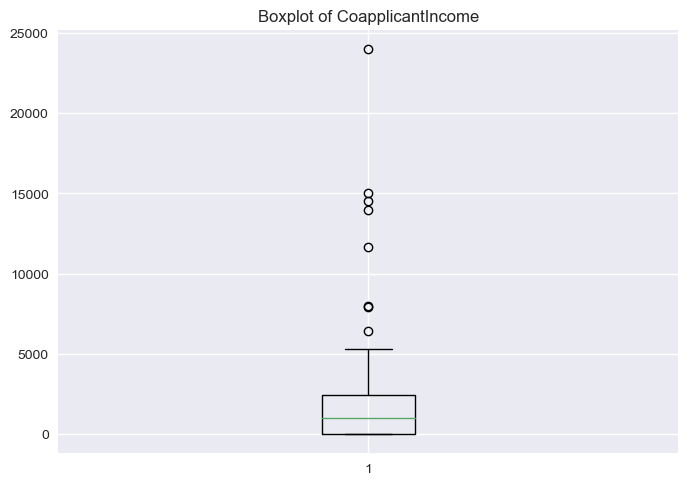

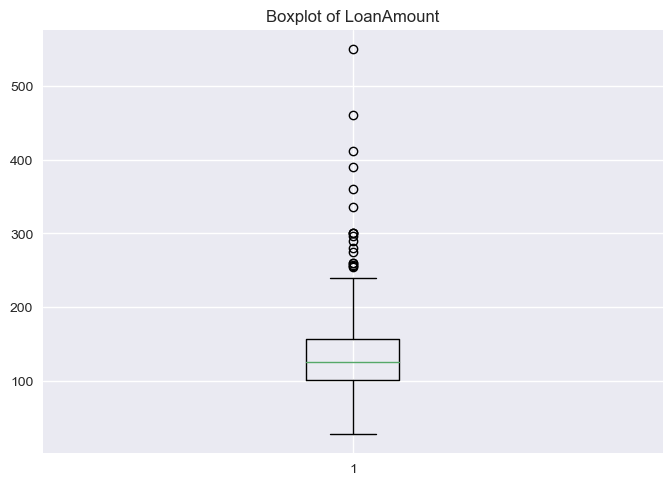

In [802]:
# boxplot of outliers in continuous numerical features
for i in test_numerical_continuous_feature:
    
    # boxplot of columns
    plt.boxplot(test[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ Outliers are present in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' columns

In [803]:
# display outliers present in continuous numerical features
for i in test_numerical_continuous_feature:
    
    # display column name
    print(f"{i} column\n")
    
    # display first quartile
    test_Q1_i = np.percentile(test[i], 25, interpolation='midpoint')
    print(f"First Quartile = {test_Q1_i}")
    
    # display second quartile
    test_Q2_i = np.percentile(test[i], 50, interpolation='midpoint')
    print(f"Second Quartile = {test_Q2_i}")
    
    # display third quartile
    test_Q3_i = np.percentile(test[i], 75, interpolation='midpoint')
    print(f"Third Quartile = {test_Q3_i}")
    
    # display interquartile range
    test_IQR_i =  test_Q3_i-test_Q1_i
    print(f"IQR = {test_IQR_i}")
    
    # display lower whisker
    test_low_i = test_Q1_i-1.5*test_IQR_i
    print(f"lower whisker = {test_low_i}")
    
    # display upper whisker
    test_up_i = test_Q3_i+1.5*test_IQR_i
    print(f"upper whisker = {test_up_i}\n")
    
    # display outliers in columns
    test_outlier_i = [] 
    for test_x_i in test[i]:
        if((test_x_i > test_up_i) or (test_x_i < test_low_i)):
            test_outlier_i.append(test_x_i) 
    print(f"Outliers = {test_outlier_i}\n\n\n")
        

ApplicantIncome column

First Quartile = 2864.0
Second Quartile = 3786.0
Third Quartile = 5060.0
IQR = 2196.0
lower whisker = -430.0
upper whisker = 8354.0

Outliers = [13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]



CoapplicantIncome column

First Quartile = 0.0
Second Quartile = 1025.0
Third Quartile = 2430.5
IQR = 2430.5
lower whisker = -3645.75
upper whisker = 6076.25

Outliers = [7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]



LoanAmount column

First Quartile = 101.0
Second Quartile = 125.0
Third Quartile = 157.5
IQR = 56.5
lower whisker = 16.25
upper whisker = 242.25

Outliers = [280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]





## CORRELATION

In [804]:
# Correlation performed on numerical features
test_P = test[test_numerical_features]

In [805]:
# creating an instance for correlation
test_corrmatrix = test_P.corr()

# displaying the values of 'corrmatrix'
test_corrmatrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.488737,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150034,-0.008633,-0.058004
LoanAmount,0.488737,0.150034,1.000000,0.091867,-0.012932
Loan_Amount_Term,0.023319,-0.008633,0.091867,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.012932,-0.048189,1.000000


In [806]:
# display the summary statistics 
test[test_numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [807]:
# unique values in 'Credit_History' column
test['Credit_History'].unique()

array([1., 0.])

## SCALING
### MIN MAX SCALING
~ Performing min max scaling on numerical_features without 'Credit_History' column, since it is an encoded column.

In [808]:
# preparing the dataframe to do min max scaling and display it
test_A = test[test_numerical_features].drop(['Credit_History'], axis = 1)
test_A

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
3,2340,2546,100.0,360.0
4,3276,0,78.0,360.0
...,...,...,...,...
362,4009,1777,113.0,360.0
363,4158,709,115.0,360.0
364,3250,1993,126.0,360.0
365,5000,2393,158.0,360.0


In [809]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1))

In [810]:
# Fit MinMaxScaler and tranform the scaled values 
test_scaled = minmax.fit_transform(test_A)

# display 
test_scaled

array([[0.07886501, 0.        , 0.15708812, 0.74683544],
       [0.04241062, 0.0625    , 0.18773946, 0.74683544],
       [0.06893794, 0.075     , 0.34482759, 0.74683544],
       ...,
       [0.04480966, 0.08304167, 0.18773946, 0.74683544],
       [0.06893794, 0.09970833, 0.24904215, 0.74683544],
       [0.12684581, 0.        , 0.13409962, 0.36708861]])

In [811]:
# converting back to a dataframe since it is array format
test_scaled = pd.DataFrame(test_scaled, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
test_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.078865,0.000000,0.157088,0.746835
1,0.042411,0.062500,0.187739,0.746835
2,0.068938,0.075000,0.344828,0.746835
3,0.032263,0.106083,0.137931,0.746835
4,0.045168,0.000000,0.095785,0.746835
...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835
363,0.057329,0.029542,0.166667,0.746835
364,0.044810,0.083042,0.187739,0.746835
365,0.068938,0.099708,0.249042,0.746835


In [812]:
# display the summary statistics after applying scaling
test_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,367.000000,367.000000,367.000000,367.000000
mean,0.066258,0.065399,0.206860,0.710597
std,0.067707,0.097260,0.116781,0.136410
min,0.000000,0.000000,0.000000,0.000000
25%,0.039488,0.000000,0.139847,0.746835
50%,0.052200,0.042708,0.185824,0.746835
75%,0.069765,0.101271,0.248084,0.746835
max,1.000000,1.000000,1.000000,1.000000


## ENCODING

In [813]:
# display categorical columns
test_categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [814]:
# displaying unique values in categorical columns
for i in test_categorical_features:
    test_uni = test[i].unique()
    print(f"Unique values of {i} column = {test_uni}\n")

Unique values of Gender column = ['Male' 'Female']

Unique values of Married column = ['Yes' 'No']

Unique values of Dependents column = ['0' '1' '2' '3+']

Unique values of Education column = ['Graduate' 'Not Graduate']

Unique values of Self_Employed column = ['No' 'Yes']

Unique values of Property_Area column = ['Urban' 'Semiurban' 'Rural']



### LABEL ENCODING
~ performing label encoding for 'Gender', 'Married', 'Education', 'Self_Employed' columns

In [815]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [816]:
# applying label encoder to 'Gender' column and displaying it
test_label_encoded_gender = le.fit_transform(test['Gender'])
test_label_encoded_gender

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [817]:
# converting 'Gender' column back to a dataframe since it is array format
test_label_encoded_gender = pd.DataFrame(test_label_encoded_gender, columns=['Gender'])
test_label_encoded_gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [818]:
# applying label encoder to 'Married' column and displaying it
test_label_encoded_married = le.fit_transform(test['Married'])
test_label_encoded_married

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [819]:
# converting 'Married' column back to a dataframe since it is array format
test_label_encoded_married = pd.DataFrame(test_label_encoded_married, columns=['Married'])
test_label_encoded_married

,Married
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,0
365,1


In [820]:
# applying label encoder to 'Education' column and displaying it
test_label_encoded_education = le.fit_transform(test['Education'])
test_label_encoded_education

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [821]:
# converting 'Education' column back to a dataframe since it is array format
test_label_encoded_education = pd.DataFrame(test_label_encoded_education, columns=['Education'])
test_label_encoded_education

,Education
0,0
1,0
2,0
3,0
4,1
...,...
362,1
363,0
364,0
365,0


In [822]:
# applying label encoder to 'Self_Employed' column and displaying it
test_label_encoded_selfemployed = le.fit_transform(test['Self_Employed'])
test_label_encoded_selfemployed

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [823]:
# converting 'Self_Employed' column back to a dataframe since it is array format
test_label_encoded_selfemployed = pd.DataFrame(test_label_encoded_selfemployed, columns=['Self_Employed'])
test_label_encoded_selfemployed

,Self_Employed
0,0
1,0
2,0
3,0
4,0
...,...
362,1
363,0
364,0
365,0


### ONE HOT  ENCODING
~ performing one hot encoding for 'Dependents', 'Property_Area' columns


In [824]:
# performing one hot encoding on the column 'Dependents' and displaying it
test_hot_encoded_dependents = pd.get_dummies(test['Dependents'])

test_hot_encoded_dependents

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
362,0,0,0,1
363,1,0,0,0
364,1,0,0,0
365,1,0,0,0


In [825]:
# performing one hot encoding on the column 'Property_Area'  and displaying it
test_hot_encoded_propertyarea = pd.get_dummies(test['Property_Area'])

test_hot_encoded_propertyarea

,Rural,Semiurban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
362,0,0,1
363,0,0,1
364,0,1,0
365,1,0,0


In [826]:
# count of unique values 
test['Loan_ID'].nunique()

367

~ The test dataset is having 367 rows and  'Loan_ID' column is having 367 unique values. Hence it does not contribute much to the machine learning model.

## SETTING THE DATASET  FEATURES OF TEST DATA

~ Features = 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area' columns

In [827]:
# concatenating the encoded and the scaled columns which gives features
test_X = pd.concat([test_label_encoded_gender, test_label_encoded_married, test_hot_encoded_dependents, test_label_encoded_education, test_label_encoded_selfemployed, test_scaled, test['Credit_History'], test_hot_encoded_propertyarea], axis=1) 

# displaying  features
test_X

,Gender,Married,0,1,2,3+,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,1,1,0,0,0,0,0,0.078865,0.000000,0.157088,0.746835,1.0,0,0,1
1,1,1,0,1,0,0,0,0,0.042411,0.062500,0.187739,0.746835,1.0,0,0,1
2,1,1,0,0,1,0,0,0,0.068938,0.075000,0.344828,0.746835,1.0,0,0,1
3,1,1,0,0,1,0,0,0,0.032263,0.106083,0.137931,0.746835,1.0,0,0,1
4,1,0,1,0,0,0,1,0,0.045168,0.000000,0.095785,0.746835,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,0,0,1,1,1,0.055274,0.074042,0.162835,0.746835,1.0,0,0,1
363,1,1,1,0,0,0,0,0,0.057329,0.029542,0.166667,0.746835,1.0,0,0,1
364,1,0,1,0,0,0,0,0,0.044810,0.083042,0.187739,0.746835,1.0,0,1,0
365,1,1,1,0,0,0,0,0,0.068938,0.099708,0.249042,0.746835,1.0,1,0,0


In [828]:
# storing to a new variable
X_test2 = test_X

###  Model prediction using Random Forest

In [829]:
# predict the target of the test data using the features of test data
test_y_pred_ranfor = ranfor_model.predict(X_test2)
test_y_pred_ranfor

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [830]:
# converting back to a dataframe since it is array format
test_y_pred_ranfor = pd.DataFrame(test_y_pred_ranfor, columns=['Loan_Status'])
test_y_pred_ranfor

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [831]:
# concatenating the 2 columns for submission and display it
submission_ranfor = pd.concat([test['Loan_ID'], test_y_pred_ranfor], axis=1) 
submission_ranfor

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [832]:
# saving the above dataframe in '.csv' format
submission_ranfor.to_csv(r'C:\Users\Asus\NORKA\17th jan 2023\submit_ranfor.csv', index=False)